In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

***
### Read Data File (WeNet)

In [18]:
cols = list(pd.read_csv("net_aigenerated_data_azure_performance_stu.csv", nrows=1))
print(cols)

net_aigenerated_data_azure = pd.read_csv('/projectnb/ds549/projects/AImpower/azure-evals/net_aigenerated_data_azure_performance_stu.csv', delimiter=',', usecols =[i for i in cols if "Unnamed:" not in i])


['Unnamed: 0', 'Filename', 'Start_time', 'End_time', 'Azure', 'WER', 'Stutterance_Count', 'NA_Count', 'NA_Cleaned_Count', 'rouge1-precision', 'rouge1-recall', 'rouge1-f1', 'rouge2-precision', 'rouge2-recall', 'rouge2-f1', 'rougel-precision', 'rougel-recall', 'rougel-f1', 'Cleaned_Transcript', 'GroundTruth_Transcript', 'Duration', 'Freq_Duration', 'Freq_CharCount']


In [19]:
net_aigenerated_data_azure = net_aigenerated_data_azure.assign(Duration=net_aigenerated_data_azure['End_time']-net_aigenerated_data_azure['Start_time'])
net_aigenerated_data_azure = net_aigenerated_data_azure.assign(Freq_Duration=net_aigenerated_data_azure["Stutterance_Count"]/net_aigenerated_data_azure["Duration"])
net_aigenerated_data_azure = net_aigenerated_data_azure.assign(Freq_CharCount=net_aigenerated_data_azure["Stutterance_Count"]/net_aigenerated_data_azure["GroundTruth_Transcript"].str.len())


In [20]:
net_aigenerated_data_azure

,Filename,Start_time,End_time,Azure,WER,Stutterance_Count,NA_Count,NA_Cleaned_Count,rouge1-precision,rouge1-recall,...,rouge2-recall,rouge2-f1,rougel-precision,rougel-recall,rougel-f1,Cleaned_Transcript,GroundTruth_Transcript,Duration,Freq_Duration,Freq_CharCount
0,D0001_A,2081.540000,2109.650000,我说出来就比较的需要时间啊，然后那个嗯识别的它的它就是它等你一会儿你那个话还没有说完的，还没...,0.072165,1.0,470,0,0.948718,0.973684,...,0.836066,0.842975,0.942857,0.942857,0.942857,我说出来就比较的需要时间，哦，然后那个嗯识别的它的就是它等你一会儿，你那个话还没有说完，的还...,我说出来就比较的需要时间，哦，然后那个嗯/i识别的它的就是它等你一会儿，你那个话还没有说完，...,28.110000,0.035575,0.010101
1,D0001_A,790.130000,796.580000,电视剧。,0.600000,1.0,470,0,1.000000,0.285714,...,0.000000,0.000000,1.000000,0.285714,0.444444,电视剧有，我说的话。,电视剧有，我/r说的话。,6.450000,0.155039,0.083333
2,D0001_A,1562.083518,1586.220000,这部剧是不怎么？,0.875000,10.0,470,0,0.750000,0.096774,...,0.050000,0.093023,0.750000,0.071429,0.130435,这部剧是不怎么，评分是不怎么好的，呃就因为呃评论区的那些人，他们都在说，呃男二号就好惨的那个...,这/b部剧是不怎么，评分是不怎么好的，呃/i就因为呃/i评/r/b论区的那[那]些人，他们都...,24.136482,0.414311,0.117647
3,D0001_A,2016.780000,2035.673559,很很精准，对。,0.868421,7.0,470,0,0.800000,0.200000,...,0.107143,0.181818,0.666667,0.129032,0.216216,很精准，对，呃讯飞语音还是讯飞助手来着，就我记得它是叫讯飞，我之前就是它呃是,很[很/b]精准，对，呃/i讯飞语音还是讯飞助手来着，就[就]我记得它是叫讯/r飞，我之前就...,18.893559,0.370497,0.129630
4,D0001_A,1682.670000,1709.110000,一个，那个是，嗯，叫。,0.882353,8.0,470,0,1.000000,0.212121,...,0.022727,0.038462,0.777778,0.142857,0.241379,一个那个是嗯叫啥来着，我忘了，就是出现了另一个人，然后呢他就射了一把剑，然后就把那个嗯男二号...,一个那个是嗯/i叫啥来着，我忘了，就是出现了另/r/b一个人，然后呢他[他]就射/p了一把剑...,26.440000,0.302572,0.093023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37248,P0070,2586.616000,2589.346000,单曲循环歌曲，这样而已。,0.090909,0.0,470,0,0.857143,1.000000,...,0.800000,0.727273,0.857143,1.000000,0.923077,单曲循环歌曲这样而已。,单曲循环歌曲这样而已。,2.730000,0.000000,0.000000
37249,P0070,2782.496000,2783.706000,杨幂的电影。,0.000000,0.0,470,0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,杨幂的电影。,杨幂的电影。,1.210000,0.000000,0.000000
37250,P0070,2995.296000,2998.116000,你好米呀今天柴油价怎么样？,0.200000,0.0,470,0,0.625000,0.625000,...,0.375000,0.400000,0.625000,0.555556,0.588235,你好，米雅，今天柴油价怎么样。,你好，米雅，今天柴油价怎么样。,2.820000,0.000000,0.000000
37251,P0070,2604.066000,2606.656000,单曲循环歌曲流离光之歌。,0.166667,0.0,470,0,0.833333,0.833333,...,0.600000,0.600000,0.833333,0.833333,0.833333,单曲循环歌曲琉璃光之歌。,单曲循环歌曲琉璃光之歌。,2.590000,0.000000,0.000000


In [21]:
## SAVING

net_aigenerated_data_azure.to_csv('net_aigenerated_data_azure_performance_stu.csv', sep=',')

# net_aigenerated_data_azure

## Visualization (Azure)

### Frequency setup: stuttering count/second

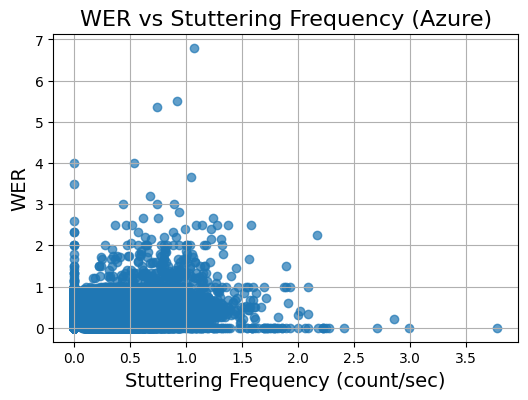

In [22]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/sec)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [9]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_Duration'], net_aigenerated_data_azure.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.0
rho = 0.439569507858755


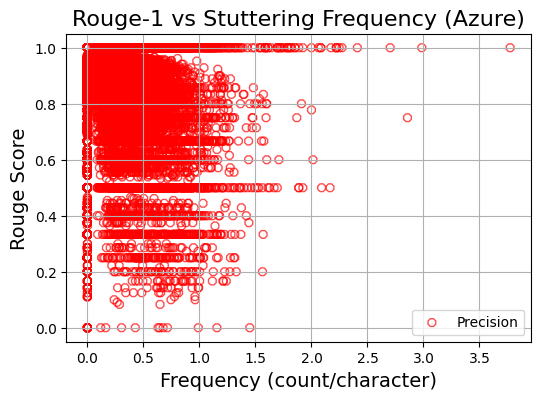

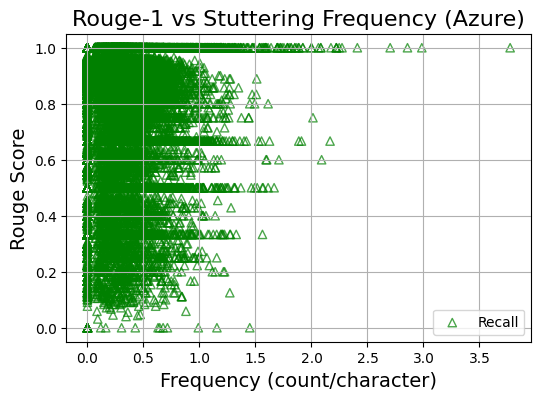

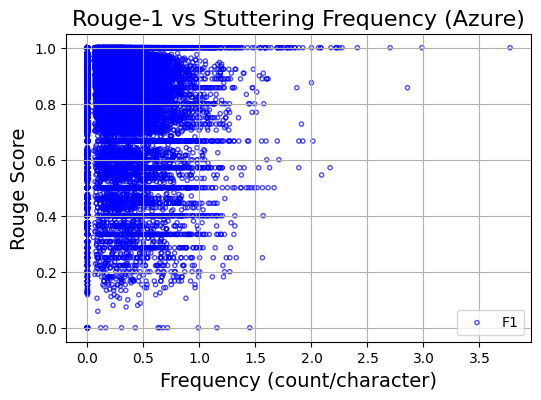

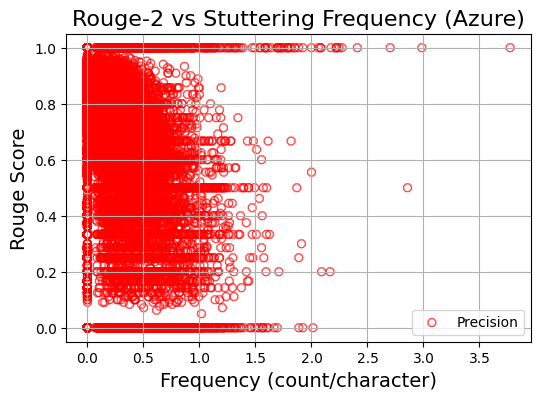

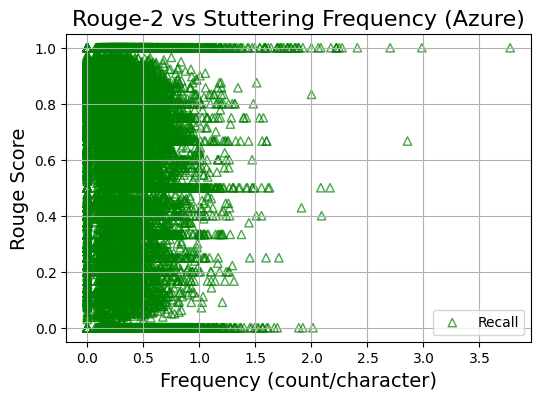

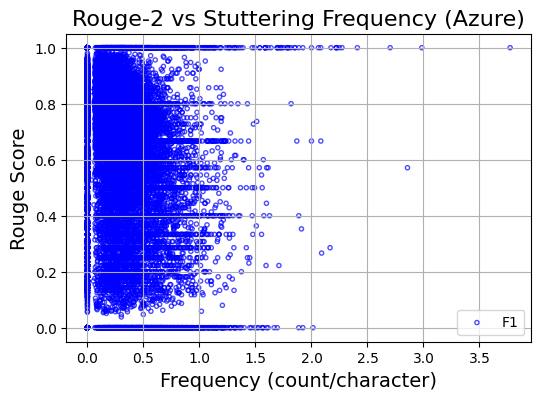

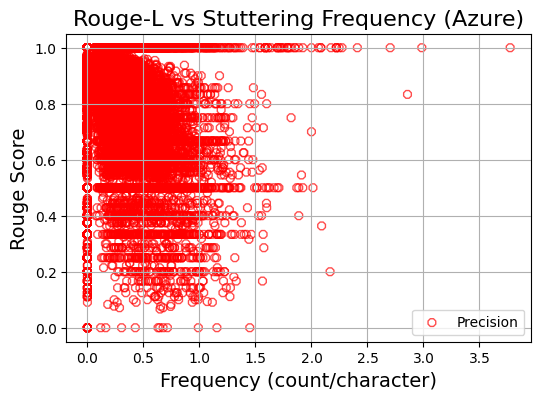

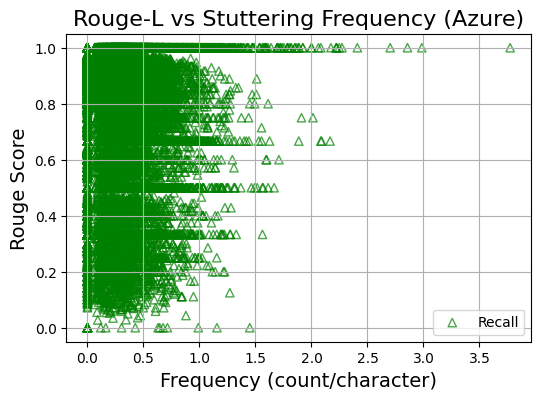

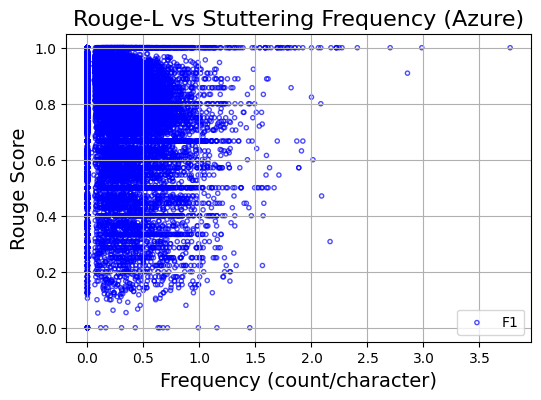

In [23]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_Duration"], 
    net_aigenerated_data_azure["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [11]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_Duration'], net_aigenerated_data_azure.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_Duration'], net_aigenerated_data_azure.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_Duration'], net_aigenerated_data_azure.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 0.0
rho [stuttering count & rouge-1 f1] = -0.2335082650851038
p-value [stuttering count & rouge-2 f1] = 0.0
rho [stuttering count & rouge-2 f1] = -0.2782507073296583
p-value [stuttering count & rouge-L f1] = 0.0
rho [stuttering count & rouge-L f1] = -0.3298753507846127


### Frequency Setup: Stuttering Count/Character

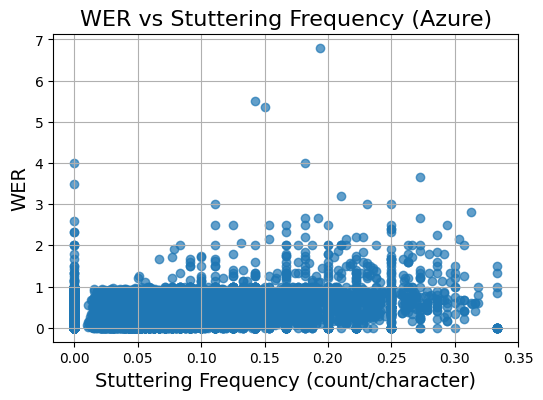

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["WER"], 
    alpha=0.7  # Handle overlapping points
)

plt.title("WER vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Stuttering Frequency (count/character)", fontsize=14)
plt.ylabel("WER", fontsize=14)
plt.grid(True)
plt.show()

In [13]:
from scipy.stats import spearmanr
rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_CharCount'], net_aigenerated_data_azure.dropna()['WER'])
print(f"p-value = {p}")
print(f"rho = {rho}")

p-value = 0.0
rho = 0.4573312340784053


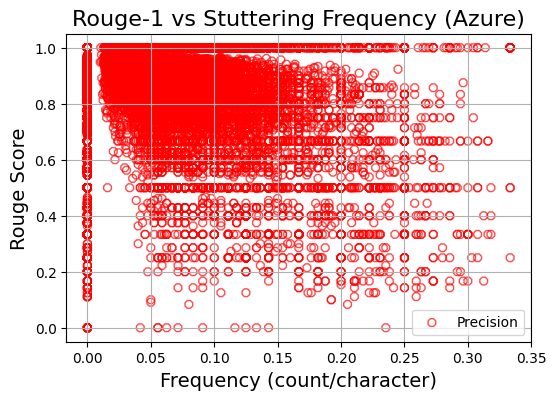

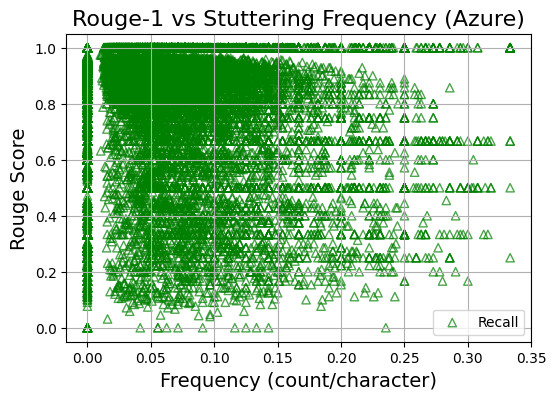

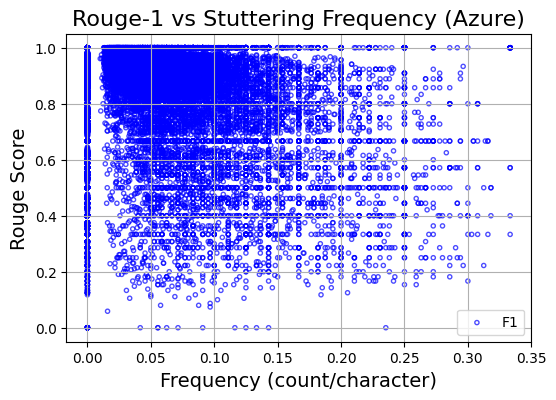

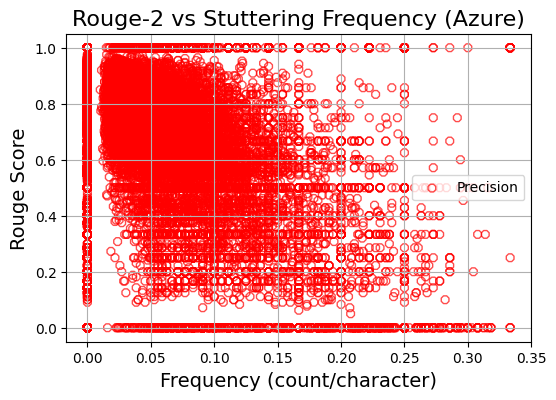

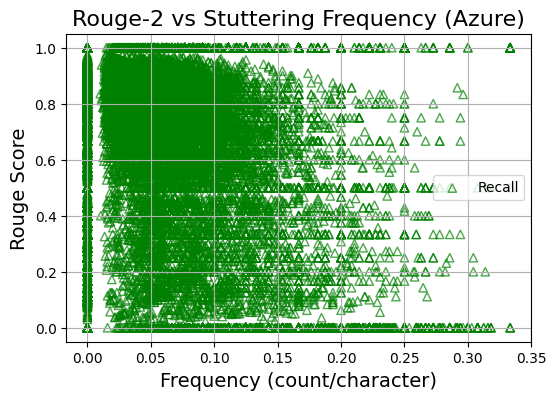

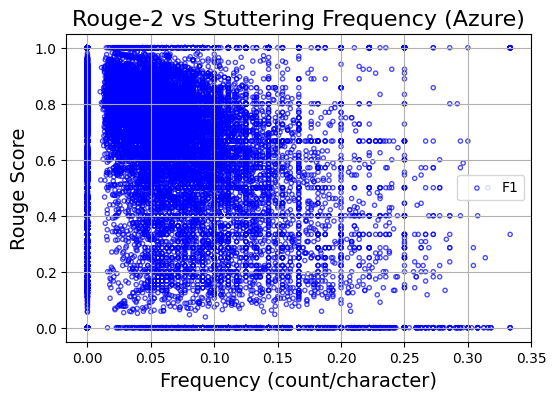

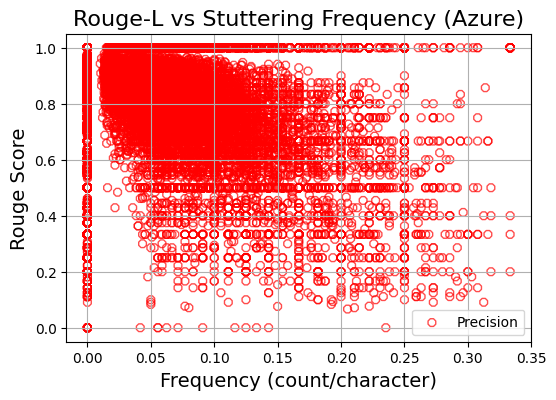

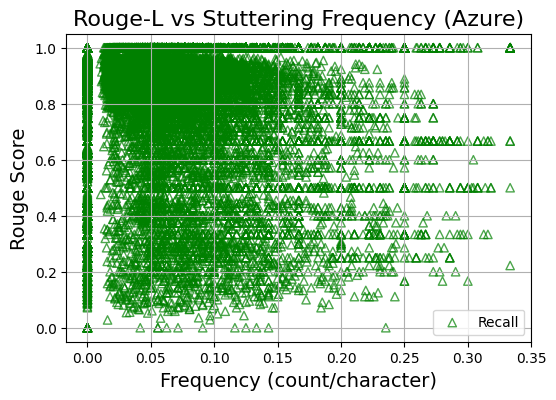

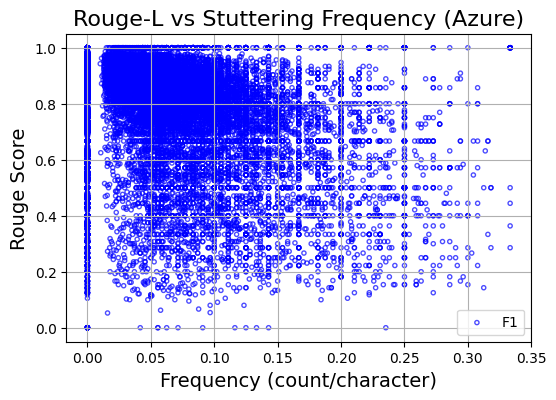

In [25]:
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge1-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge1-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge1-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)


plt.title("Rouge-1 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge2-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge2-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rouge2-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-2 vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rougel-precision"], 
    facecolors="none", edgecolors='r',
    label="Precision",
    marker="8",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rougel-recall"], 
    facecolors="none", edgecolors='g',
    label="Recall",
    marker="^",
    alpha=0.7  # Handle overlapping points
)
plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(
    net_aigenerated_data_azure["Freq_CharCount"], 
    net_aigenerated_data_azure["rougel-f1"], 
    facecolors="none", edgecolors='b',
    label="F1",
    marker=".",
    alpha=0.7  # Handle overlapping points
)

plt.title("Rouge-L vs Stuttering Frequency (Azure)", fontsize=16)
plt.xlabel("Frequency (count/character)", fontsize=14)
plt.ylabel("Rouge Score", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
from scipy.stats import spearmanr

rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_CharCount'], net_aigenerated_data_azure.dropna()['rouge1-f1'])
print(f"p-value [stuttering count & rouge-1 f1] = {p}")
print(f"rho [stuttering count & rouge-1 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_CharCount'], net_aigenerated_data_azure.dropna()['rouge2-f1'])
print(f"p-value [stuttering count & rouge-2 f1] = {p}")
print(f"rho [stuttering count & rouge-2 f1] = {rho}")


rho, p = spearmanr(net_aigenerated_data_azure.dropna()['Freq_CharCount'], net_aigenerated_data_azure.dropna()['rougel-f1'])
print(f"p-value [stuttering count & rouge-L f1] = {p}")
print(f"rho [stuttering count & rouge-L f1] = {rho}")

p-value [stuttering count & rouge-1 f1] = 0.0
rho [stuttering count & rouge-1 f1] = -0.2580723485572685
p-value [stuttering count & rouge-2 f1] = 0.0
rho [stuttering count & rouge-2 f1] = -0.3012349989629528
p-value [stuttering count & rouge-L f1] = 0.0
rho [stuttering count & rouge-L f1] = -0.3486314761999335
